In [74]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_excel(r"data/creditcardmarketing.xlsx")

In [76]:
df.head(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
df.drop('Customer Number', axis=1, inplace=True)

In [103]:
df.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [79]:
df.shape

(18000, 16)

In [80]:
df.isnull().sum()

Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.duplicated().sum()

0

In [83]:
df.shape

(17976, 16)

In [84]:
len(df[df['Offer Accepted'] == 'No'])

16955

In [85]:
df_offer = df.copy()

In [86]:
df_offer.shape

(17976, 16)

In [87]:
df_offer.dtypes

Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

# Offer yes

In [88]:
df_offer_yes = df_offer[df_offer['Offer Accepted'] == 'Yes']

In [89]:
df_offer_yes.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,1.252693,1.897160,1.202742,3.440744,934.980167,868.670911,998.813908,1060.929481,811.506366
std,0.461036,0.806956,0.423608,1.126188,348.586313,621.091927,463.188441,567.424601,548.032407
min,1.000000,1.000000,1.000000,1.000000,75.750000,2.000000,8.000000,11.000000,4.000000
25%,1.000000,1.000000,1.000000,3.000000,800.500000,359.000000,652.000000,630.000000,389.000000
50%,1.000000,2.000000,1.000000,3.000000,1008.500000,721.000000,1051.000000,964.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1151.000000,1479.000000,1347.000000,1527.000000,1198.000000
max,3.000000,4.000000,3.000000,9.000000,1879.250000,2189.000000,1995.000000,2292.000000,2197.000000


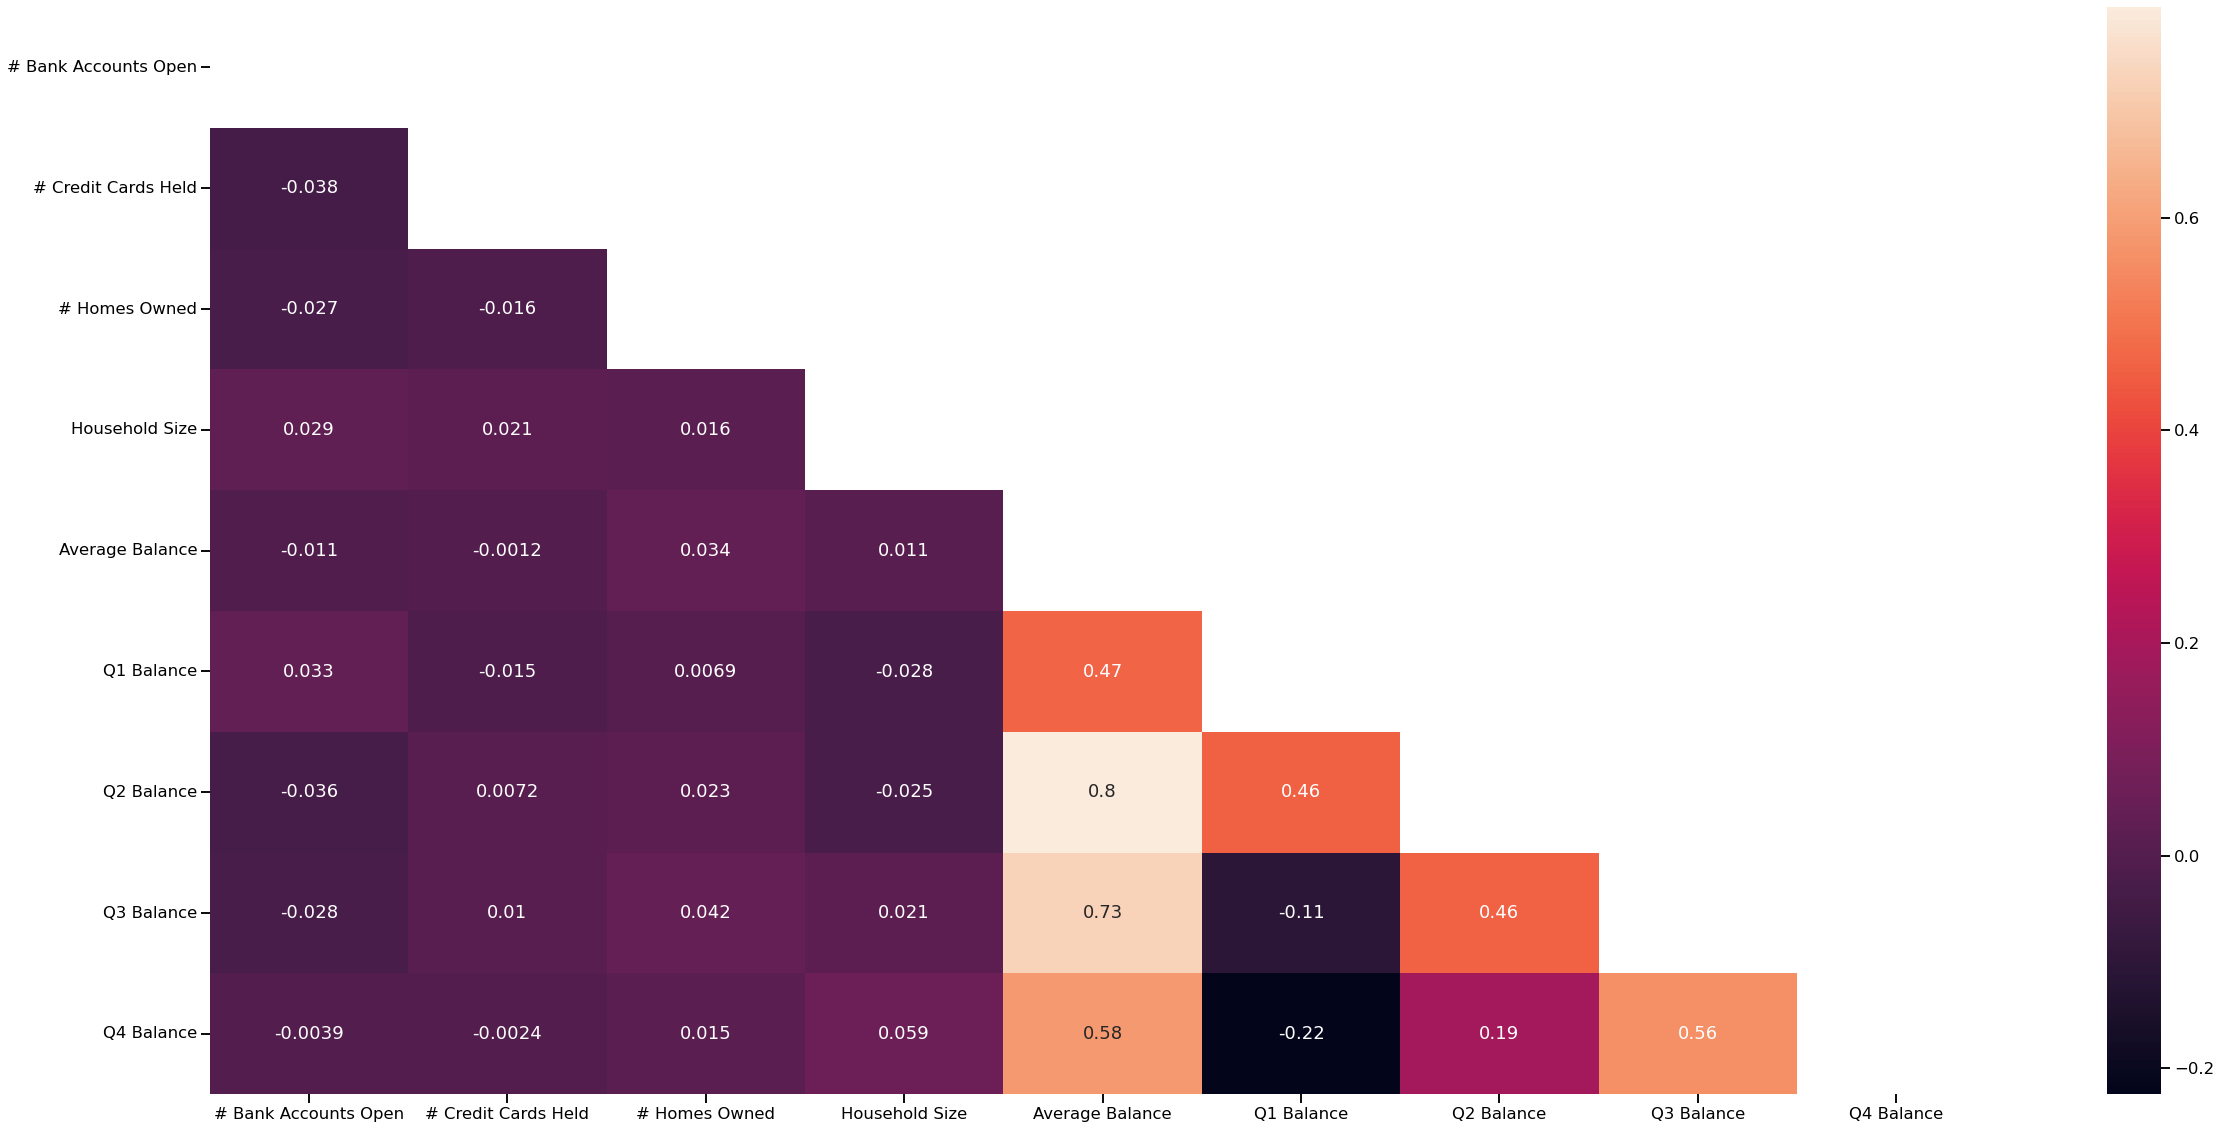

In [134]:
mask = np.triu(np.ones_like(df_offer_yes.corr(), dtype=bool))

fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df_offer_yes.corr(), annot = True, mask = mask)
plt.size = (40,40)
plt.show()

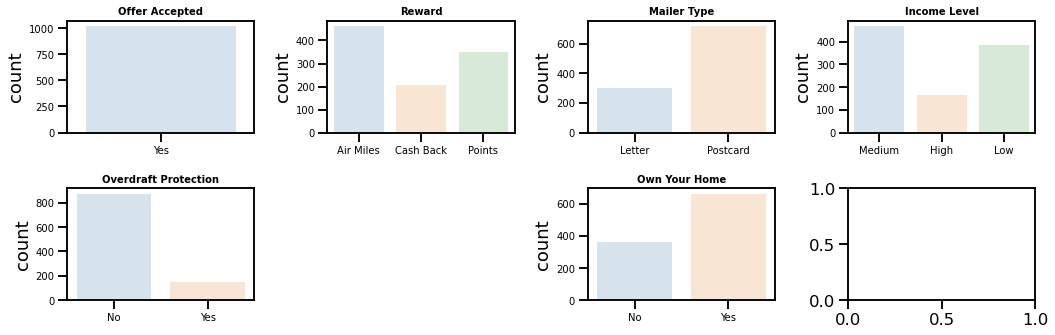

In [120]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 5))


axes = axes.flat

columnas_cat = df_offer_yes.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_offer_yes,
        x = colum,
        #hue= 'Offer Accepted',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

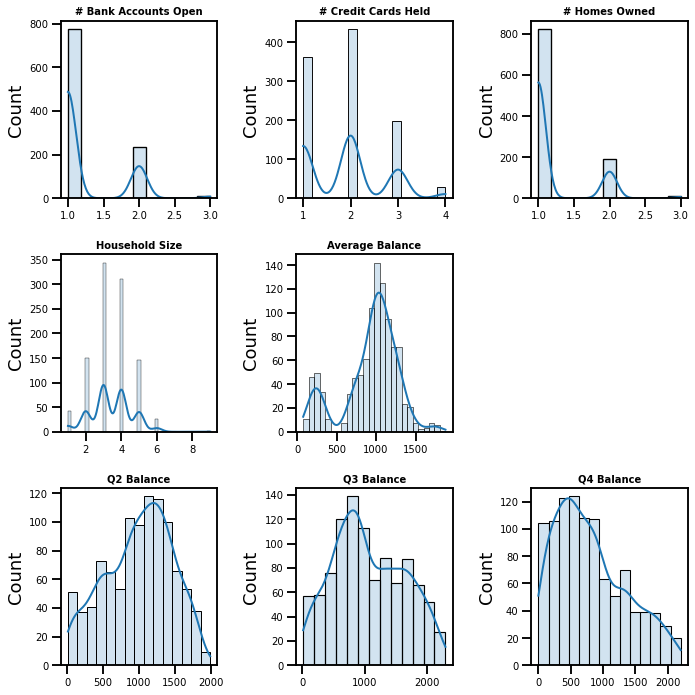

In [104]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))


axes = axes.flat

columnas_cat = df_offer_yes.select_dtypes(include = "number").columns

for i, colum in enumerate(columnas_cat):
    sns.set_context("talk")
    sns.histplot(
        data = df_offer_yes,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

In the previous charts

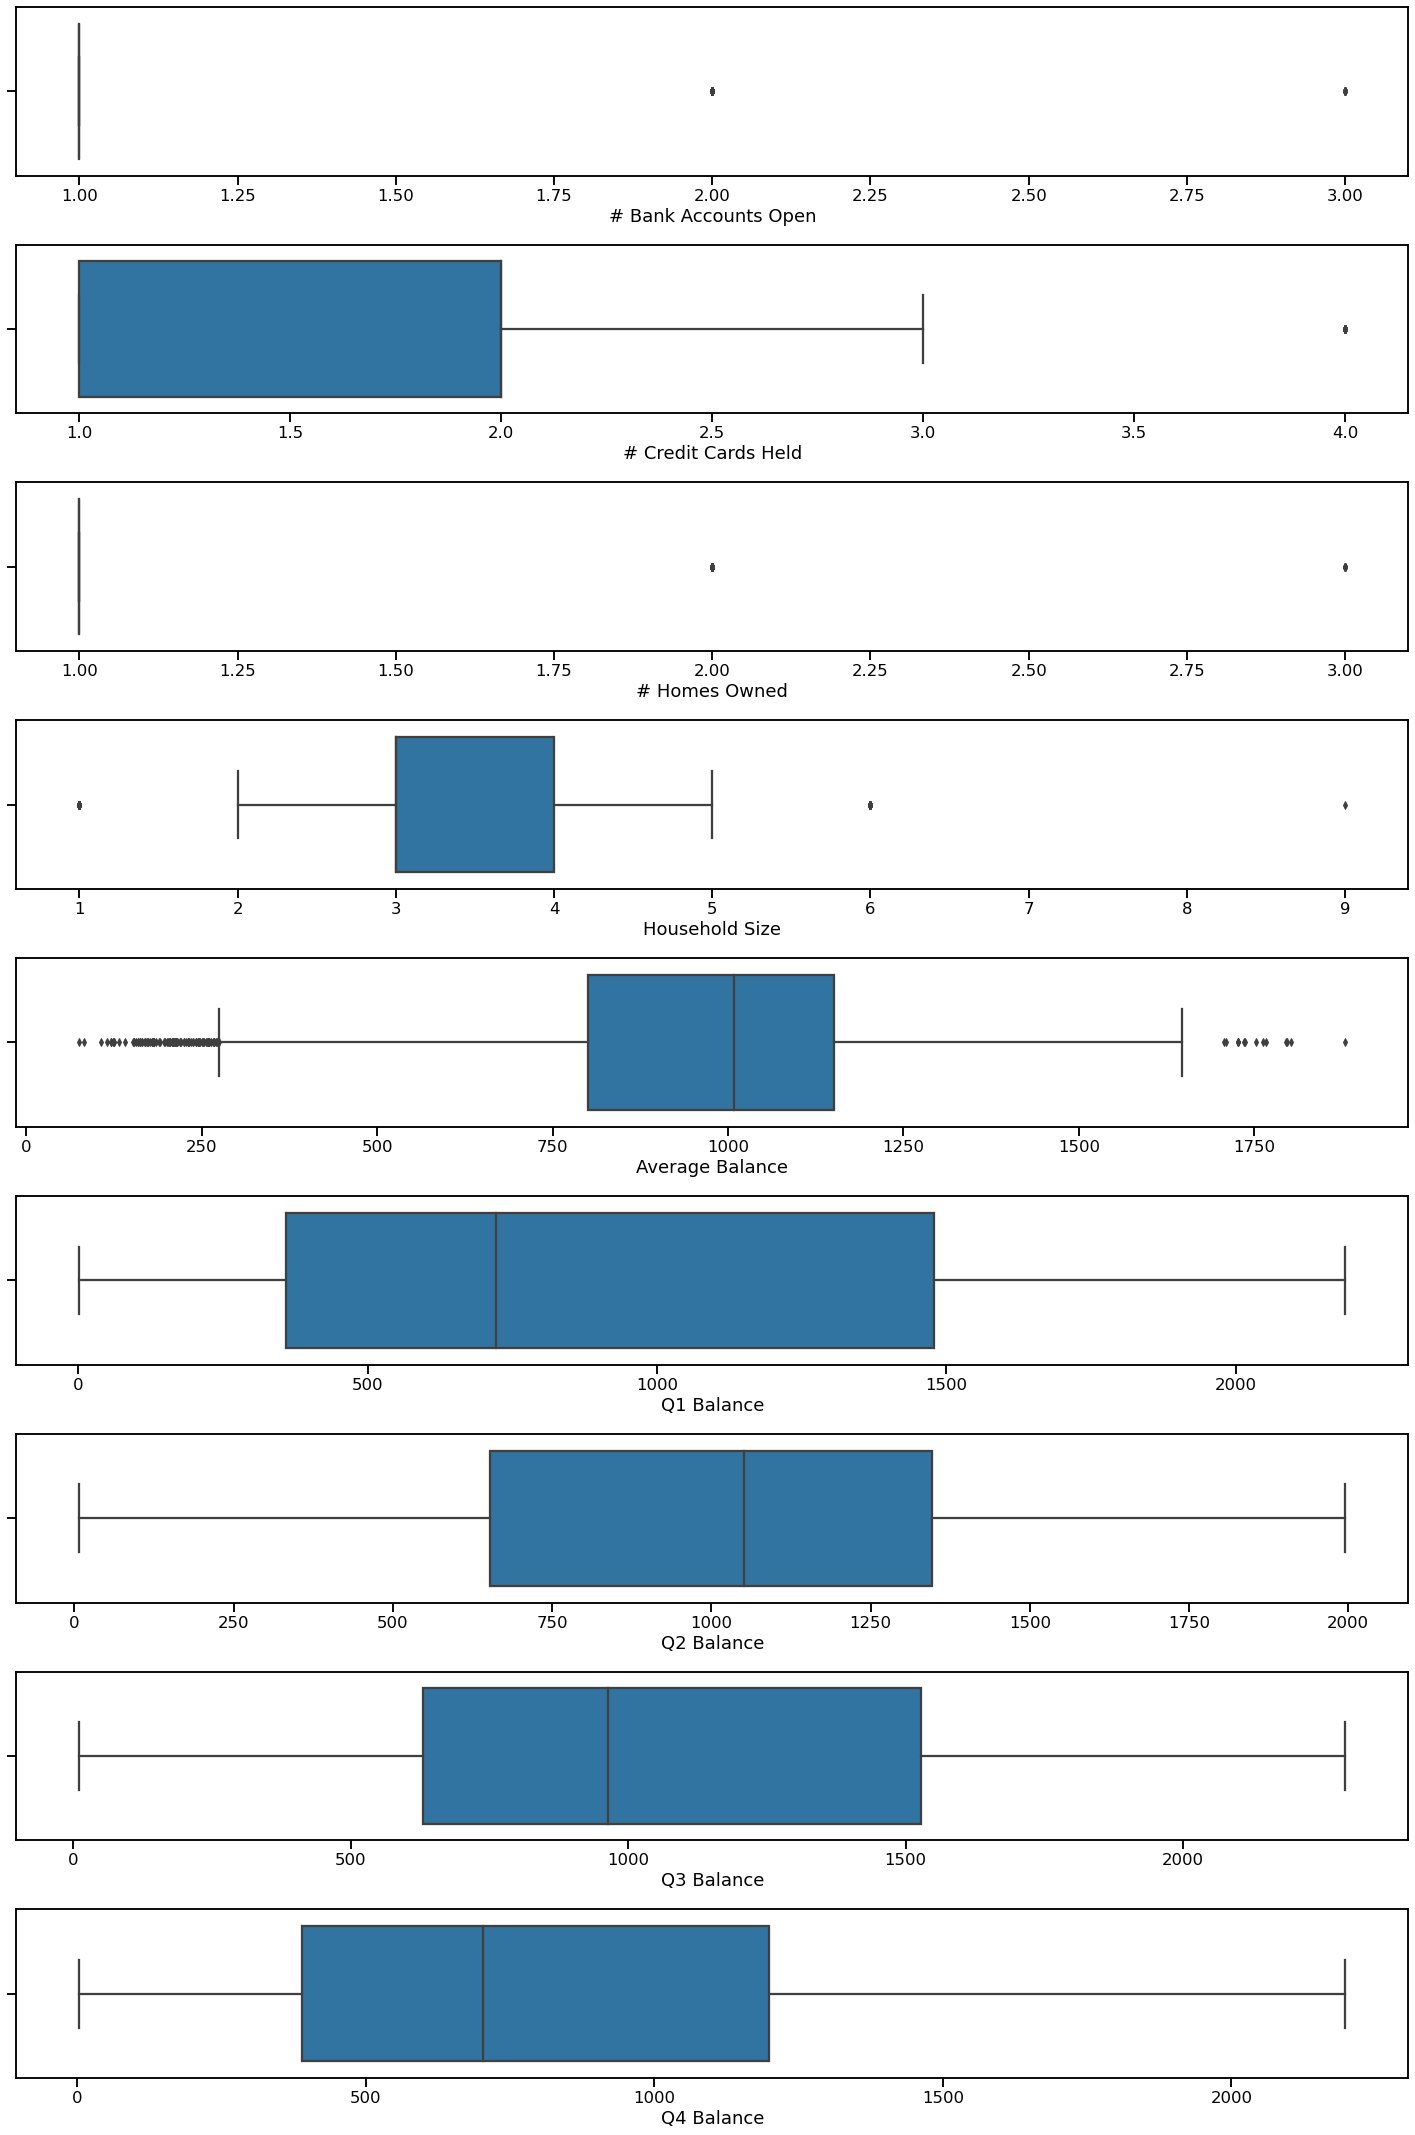

In [92]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_offer_yes.select_dtypes(include = "number").columns)):
    sns.boxplot(x=df_offer_yes.select_dtypes(include = "number").columns[i], data=df_offer_yes, ax=ax[i])
plt.tight_layout()
plt.show()

In [93]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [94]:
outliers_dict_yes = outliers_index(df_offer_yes.select_dtypes(include = "number"), df_offer_yes.select_dtypes(include = "number").columns)[0]

In [95]:
df_offer_yes.shape

(1021, 16)

In [96]:
for i, k in outliers_dict_yes.items():
    print(i, len(k))

# Bank Accounts Open 246
# Credit Cards Held 29
# Homes Owned 198
Household Size 71
Average Balance 116


# Offer no

In [97]:
df_offer_no = df[df['Offer Accepted'] == 'No']

In [135]:
df_offer_yes.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,1.252693,1.897160,1.202742,3.440744,934.980167,868.670911,998.813908,1060.929481,811.506366
std,0.461036,0.806956,0.423608,1.126188,348.586313,621.091927,463.188441,567.424601,548.032407
min,1.000000,1.000000,1.000000,1.000000,75.750000,2.000000,8.000000,11.000000,4.000000
25%,1.000000,1.000000,1.000000,3.000000,800.500000,359.000000,652.000000,630.000000,389.000000
50%,1.000000,2.000000,1.000000,3.000000,1008.500000,721.000000,1051.000000,964.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1151.000000,1479.000000,1347.000000,1527.000000,1198.000000
max,3.000000,4.000000,3.000000,9.000000,1879.250000,2189.000000,1995.000000,2292.000000,2197.000000


In [98]:
df_offer_no.shape

(16955, 16)

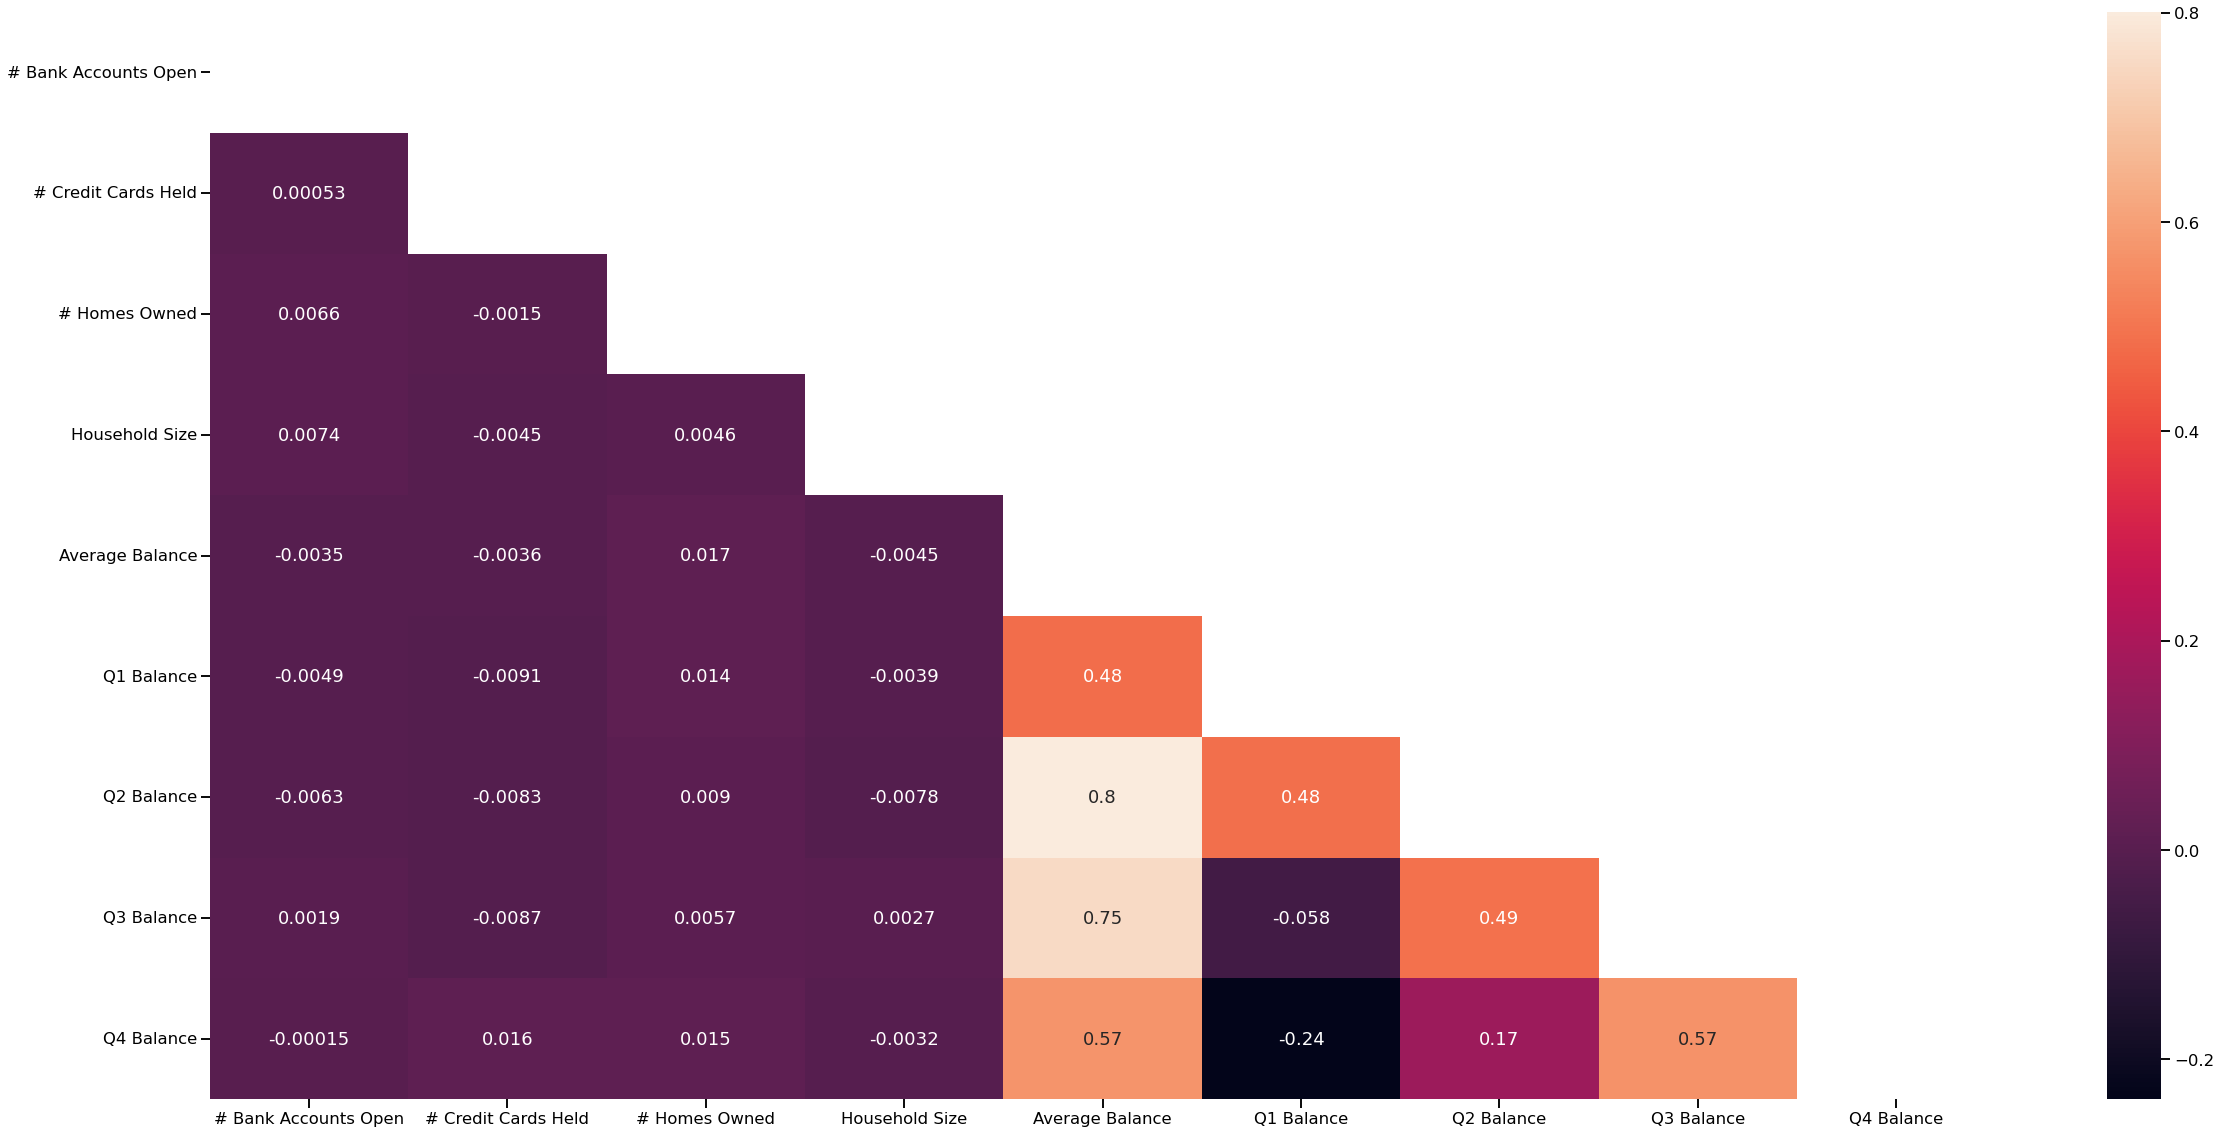

In [136]:
mask = np.triu(np.ones_like(df_offer_no.corr(), dtype=bool))

fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df_offer_no.corr(), annot = True, mask = mask)
plt.size = (40,40)
plt.show()

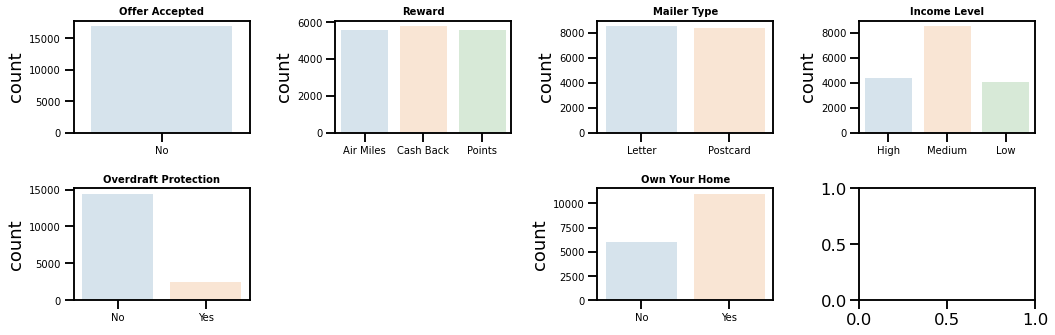

In [137]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 5))


axes = axes.flat

columnas_cat = df_offer_no.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_offer_no,
        x = colum,
        #hue= 'Offer Accepted',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

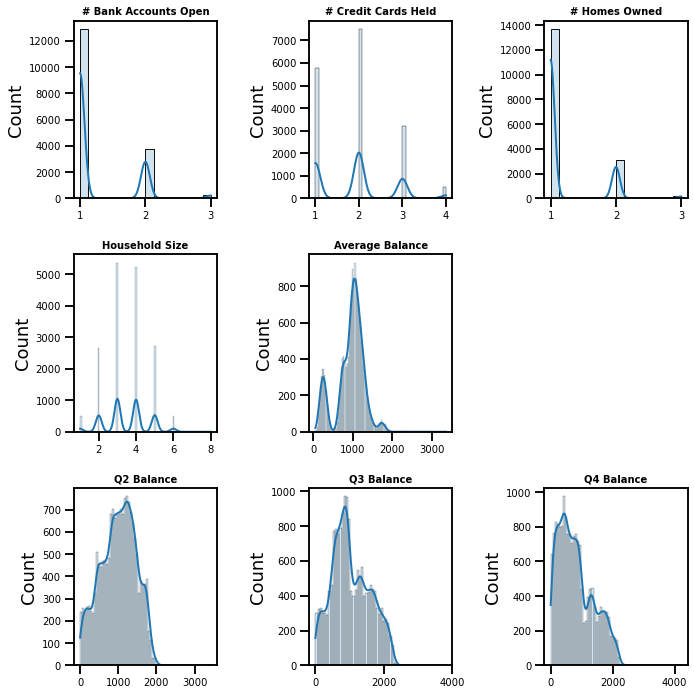

In [138]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))


axes = axes.flat

columnas_cat = df_offer_no.select_dtypes(include = "number").columns

for i, colum in enumerate(columnas_cat):
    sns.set_context("talk")
    sns.histplot(
        data = df_offer_no,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

In [99]:
outliers_dict_no = outliers_index(df_offer_no.select_dtypes(include = "number"), df_offer_no.select_dtypes(include = "number").columns)[0]

In [100]:
len(df_offer_no[df_offer_no['# Credit Cards Held'] == 4])

486

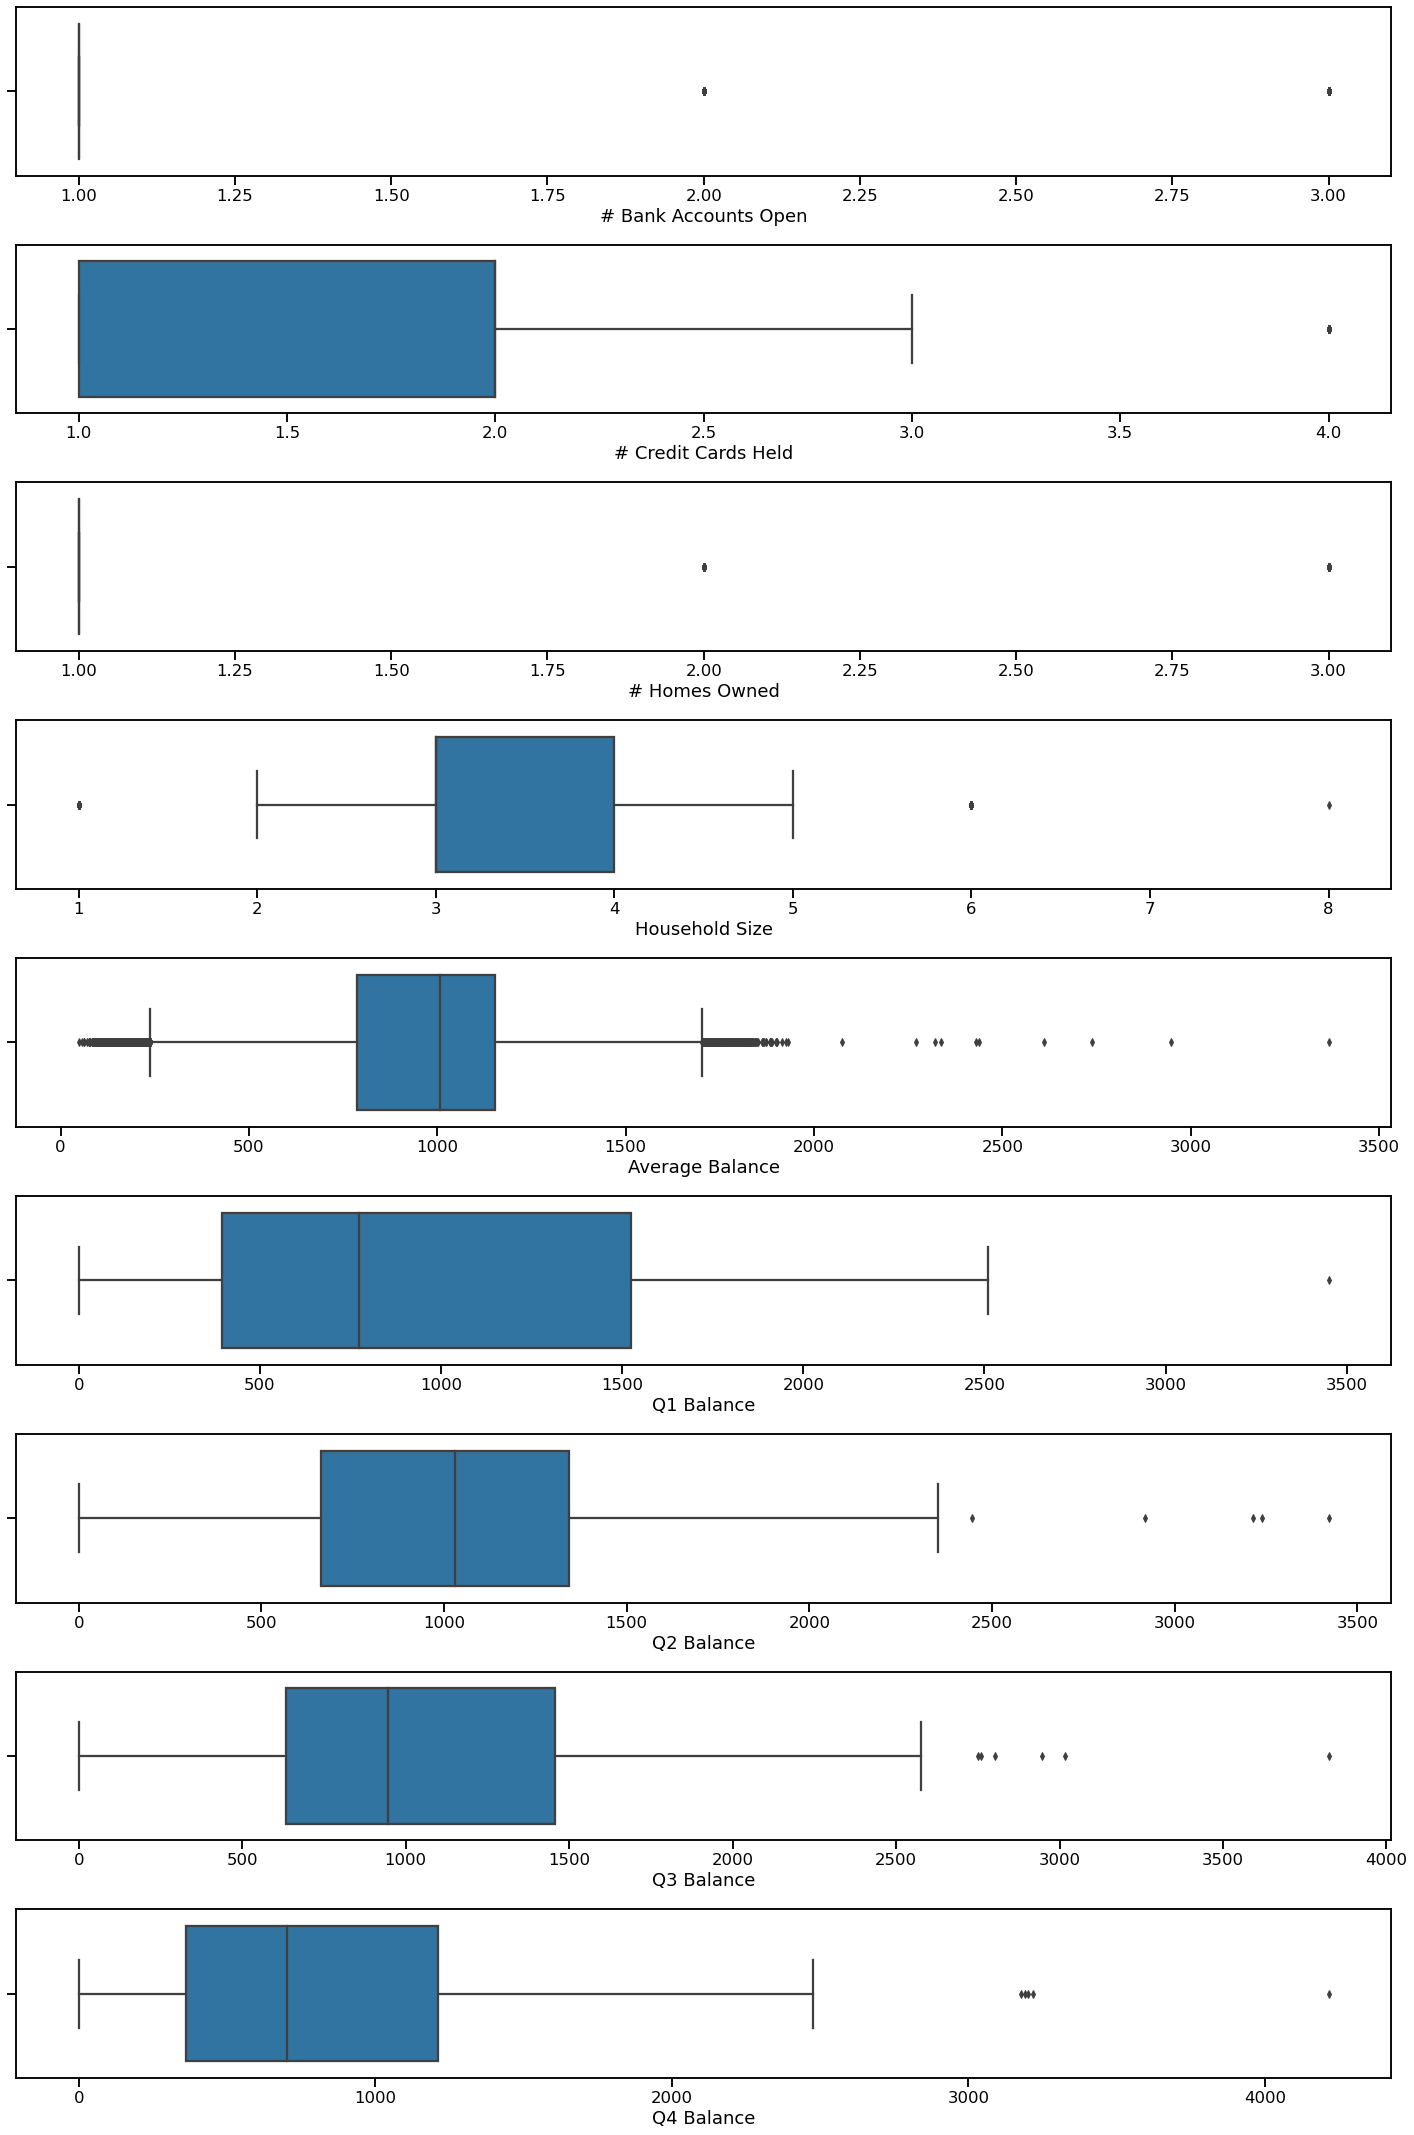

In [101]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_offer_no.select_dtypes(include = "number").columns)):
    sns.boxplot(x=df_offer_no.select_dtypes(include = "number").columns[i], data=df_offer_no, ax=ax[i])
plt.tight_layout()
plt.show()

In [102]:
for i, k in outliers_dict_no.items():
    print(i, len(k))

# Bank Accounts Open 4056
# Credit Cards Held 486
# Homes Owned 3276
Household Size 1008
Average Balance 1331
Q1 Balance 1
Q2 Balance 5
Q3 Balance 6
Q4 Balance 5
